## 사용자 행동 인식 데이터 세트

* pilot

In [23]:
import pandas as pd


df = pd.DataFrame([['a'],['a'],['a'],['b'],['b'],['a']],
                  columns=['A'])

df

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [24]:
df.groupby("A").cumcount()

# 데이터 별로 순번 정해주는 것 a -> 0,1,2 b->0,1 그다음 a 3

0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

In [25]:
old_feature_name_df = pd.DataFrame([['a'],['a'],['a'],['b'],['b'],['a']],
                  columns=['column_name'])

feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])

feature_dup_df

,dup_cnt
0,0
1,1
2,2
3,0
4,1
5,3


In [26]:
feature_dup_df = feature_dup_df.reset_index()
feature_dup_df

,index,dup_cnt
0,0,0
1,1,1
2,2,2
3,3,0
4,4,1
5,5,3


In [27]:
old_feature_name_df.reset_index()

,index,column_name
0,0,a
1,1,a
2,2,a
3,3,b
4,4,b
5,5,a


In [28]:
new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), \
                                feature_dup_df,how='outer')

new_feature_name_df

,index,column_name,dup_cnt
0,0,a,0
1,1,a,1
2,2,a,2
3,3,b,0
4,4,b,1
5,5,a,3


In [29]:
new_feature_name_df['column_name'] = \
        new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) # x의 0번째는 column_name , x의 1번째는 dup_cnt
                                    if x[1]>0 else x[0], axis=1)
        
new_feature_name_df

,index,column_name,dup_cnt
0,0,a,0
1,1,a_1,1
2,2,a_2,2
3,3,b,0
4,4,b_1,1
5,5,a_3,3


In [30]:
# import pandas as pd

# # 예시 데이터프레임 생성
# data = {'column_name': ['A', 'B', 'C', 'A', 'D', 'B', 'E']}
# df = pd.DataFrame(data)

# # 중복된 컬럼 이름 체크
# mask = df['column_name'].duplicated(keep=False)

# # 중복된 경우에만 숫자 붙이기
# df.loc[mask, 'column_name'] += '_' + df.groupby('column_name').cumcount().astype(str)

# df


# 결정 트리 실습 - Human Activity Recognition

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                              header=None,names=['column_index','column_name'])

feature_name = feature_name_df.iloc[:,1].values.tolist()

print('전체 피처명에서 10개만 추출:',feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [32]:
feature_name_df.head(10)

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
5,6,tBodyAcc-std()-Z
6,7,tBodyAcc-mad()-X
7,8,tBodyAcc-mad()-Y
8,9,tBodyAcc-mad()-Z
9,10,tBodyAcc-max()-X


In [33]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    # 각 고유 'column_name' 값의 발생 횟수를 계산하는 새로운 데이터프레임 생성
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    
    # 새로운 데이터프레임의 인덱스를 재설정
    feature_dup_df = feature_dup_df.reset_index()
    
    # 원본 데이터프레임과 새로운 데이터프레임을 인덱스를 기준으로 병합
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    
    # 'column_name'을 중복 횟수에 기반하여 수정
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply \
        (lambda x: x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis=1)
    
    return new_feature_name_df


In [34]:
import pandas as pd

def get_human_dataset():
    # 'features.txt' 파일을 읽어서 피처 이름을 가진 데이터프레임을 생성
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', \
                    header=None, names=['column_index', 'column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df() 함수를 이용하여 신규 피처명 데이터프레임 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 훈련 데이터셋을 읽어와서 X_train 데이터프레임 생성
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name) # names = 필드명
    
    # 테스트 데이터셋을 읽어와서 X_test 데이터프레임 생성
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 훈련 데이터셋의 레이블을 읽어와서 y_train 데이터프레임 생성
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    
    # 테스트 데이터셋의 레이블을 읽어와서 y_test 데이터프레임 생성
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test

# 함수를 호출하여 데이터를 읽어옴
X_train, X_test, y_train, y_test = get_human_dataset()


### ---------------중복되는 이름 유니크하게 설정하고 각 트레인 테스트 필드명에 넣는 작업------------

In [35]:
print('## 학습 피처 데이터 셋 Info()')
print(X_train.info())


## 학습 피처 데이터 셋 Info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 1 to 561
dtypes: float64(561)
memory usage: 31.5 MB
None


In [36]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


* Basic Machine Learning

In [37]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier #의사결정나무
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dt_clf =DecisionTreeClassifier(random_state=11) # 의사결정나무 생성


dt_clf.fit(X_train,y_train) # 훈련데이터를 사용하여 모델 훈련
pred = dt_clf.predict(X_test) # X_test를 사용하여 모델의 예측 값 계산
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred))) # 예측값과 test값 정확도 계산

예측 정확도: 0.8612


* GridSearchCV

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
import pandas as pd


dtree = DecisionTreeClassifier(random_state=11)

# 파라미터 설정 /  max_depth : 의사결정 트리의 최대 깊이를 지정하는 하이퍼파라미터
parameters = {'max_depth':[6,8,10,12,14,16,20,24]} 

# GridSearchCV dtree 모델에 사용하여 
grid_dtree = GridSearchCV(dtree, param_grid=parameters,cv=3,refit=True)
grid_dtree.fit(X_train,y_train) # 훈련


# grid_dtree값으로 데이터 프레임 만들기
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']] # 이름바꾸기

print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_) # 최적의 파라미터 출력
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_)) # 최고 score 출력

# grid_dtree -> refit으로 최적의 파라미터 세트가 들어있음
pred = grid_dtree.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred))) # 테스트데이터에 대한 정확도



GridSearchCV 최적 파라미터: {'max_depth': 6}
GridSearchCV 최고 정확도: 0.8406
테스트 데이터 세트 정확도: 0.8554


In [39]:
best_df_clf = grid_dtree.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8554


* feature 중요도

In [40]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]



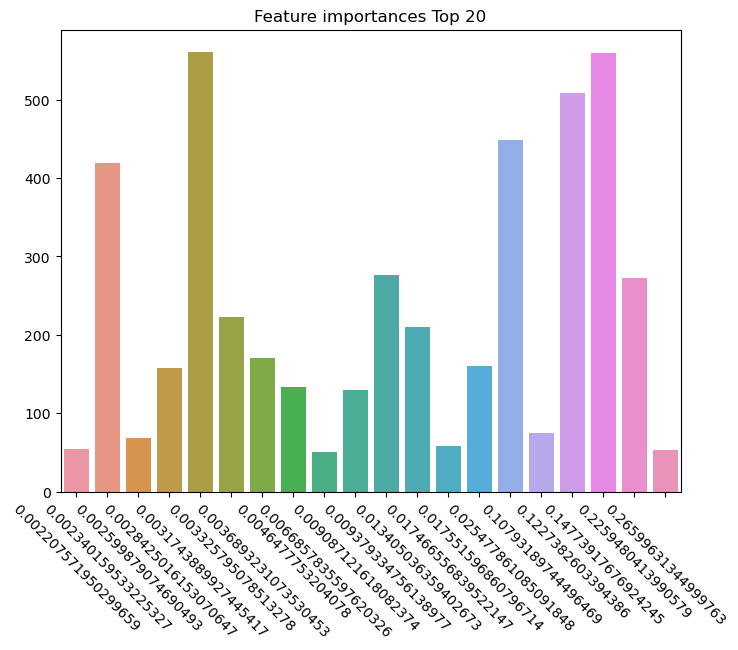

In [41]:
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
plt.xticks(rotation=-45) 
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

In [42]:
import seaborn as sns 

ftr_importance_values = best_model.feature_importances_
ftr_importance = pd.Series(ftr_importance_values,index=X_train.columns)

ftr_top20 = ftr_importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title("Feature importance Top20")
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

NameError: name 'best_model' is not defined